Alunos: Lucas Gomes Flegler e Luiz Antonio Roque Guzzo

# Passo 1 – Esboçar o gráfico da função: 
\begin{equation*}
f(x)   = \frac{senx}{x} 
\end{equation*}


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import texttable as tt
from scipy.integrate import quad
import csv

In [2]:
def gera_grafico(p1=-3*np.pi, p2=(3*np.pi), texto='nada'):
    x = np.linspace(p1,p2,200)
    y = np.sin(x)
    y2 = y / x
    plt.plot(x, y, '--r', label='sen(x)')
    plt.plot(x, y2, color='green', label='sen(x)/x')
    plt.title(texto)
    plt.xlabel(r'Eixo $x$')
    plt.ylabel('Eixo y')
    plt.legend()
    plt.show()

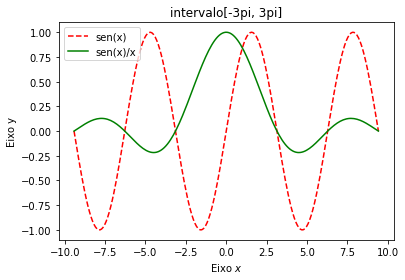

In [3]:
gera_grafico(texto='intervalo[-3pi, 3pi]')

# Passo 2 – Escrever como uma serie  a função: 
\begin{equation*}
f(x)   = \frac{senx}{x}
\end{equation*} 

## Considere a série MacLaurin para: 
\begin{equation*}
\sin (x) = \sum_{n=0}^\infty (-1)^n \frac{x^{2n+1}}{(2n+1)!}
\end{equation*}
## dividindo a serie por "x", temos:
\begin{equation*}
\frac{senx}{x} = \sum_{n=0}^\infty (-1)^n \frac{1}{x} \frac{x^{2n+1}}{(2n+1)!} = \sum_{n=0}^\infty (-1)^n \frac{x^{2n}}{(2n+1)!}
\end{equation*}

## expandindo a serie:
\begin{equation*}
\sum_{n=0}^\infty (-1)^n \frac{x^{2n}}{(2n+1)!} = 1 - \frac{x^2}{3!} + \frac{x^4}{5!} -\frac{x^6}{7!} + ...
\end{equation*}


________________________________________________________________

# Passo 3 – Escrever a derivada da função: 
\begin{equation*}
f(x)   = \frac{senx}{x}
\end{equation*} 
## verificar os valores da derivada nos pontos 
$$\begin{array}{|l||c|}
\hline \
x = 0 & x = \pi/2\\
\hline
\hline \
x = \pi & x =3\pi/2\\
\hline
\hline \
x = 2\pi & x =5\pi/2\\
\hline
\hline \
x = 3\pi & \\
\hline
\end{array}$$

## derivada da serie:
\begin{equation*}
\frac{d}{dx}(\sum_{n=0}^\infty (-1)^n \frac{x^{2n}}{(2n+1)!}) = \sum_{n=0}^\infty \frac{(-1)^n 2n}{(2n+1)!}.x^{2n-1}
\end{equation*}

In [4]:
def fatorial(x):
  if x == 0:
    return 1
  return x * fatorial(x-1)

def verifica_derivada():
    tabela = tt.Texttable()
    tabela.header(['x', 'valor'])
    valores = ['0','pi/2','pi','3pi/2','2pi','5pi/2','3pi']
    pontos = [0.0, (np.pi/2), (np.pi), (3*np.pi)/2, (2*np.pi), (5*np.pi)/2, (3*np.pi)]
    resultado = 0.0
    i = 0
    for x in pontos:
        v = valores[i] #variavel criada para deixar ajudar a preencher a tabela
        resultado = 0.0
        for n in range(1,20): # somatoria de n = 1 até 20
            fat = fatorial(((2*n)+1))
            resultado = resultado + ((((-1) ** n) * (2*n))/fat)*((x) ** ((2*n)-1)) 
        tabela.add_row([v,resultado]) #salvando os dados na tabela abaixo
        i+=1
    print(tabela.draw()) #exibindo resultados

+-------+--------+
|   x   | valor  |
+=======+========+
| 0     | 0      |
+-------+--------+
| pi/2  | -0.405 |
+-------+--------+
| pi    | -0.318 |
+-------+--------+
| 3pi/2 | 0.045  |
+-------+--------+
| 2pi   | 0.159  |
+-------+--------+
| 5pi/2 | -0.016 |
+-------+--------+
| 3pi   | -0.106 |
+-------+--------+


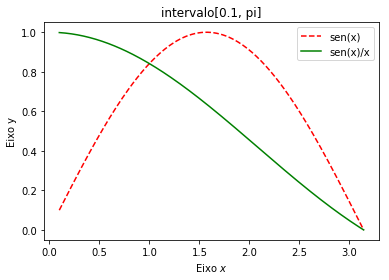

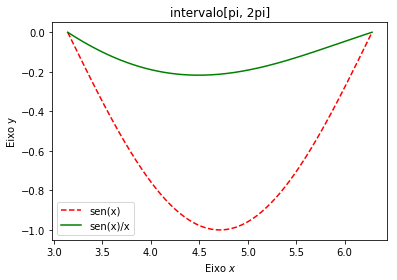

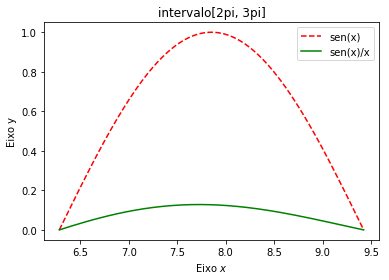

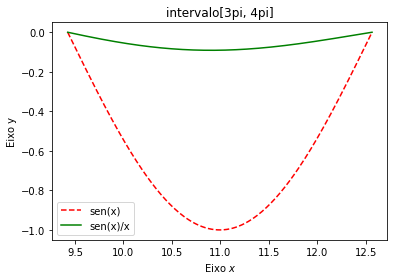

In [5]:
verifica_derivada()
gera_grafico(0.1, np.pi, texto='intervalo[0.1, pi]')
gera_grafico(np.pi, 2*np.pi, texto='intervalo[pi, 2pi]')
gera_grafico(2*np.pi, 3*np.pi, texto='intervalo[2pi, 3pi]')
gera_grafico(3*np.pi, 4*np.pi, texto='intervalo[3pi, 4pi]')

# Passo 4 – Gerar uma tabela do intervalo [0,3π] da integral

\begin{equation*}
\int_{0}^{a} f(x) dx
\end{equation*}

In [6]:
def f(x):
    i = 0
    soma = 0
    while(i < 30):
        fat = fatorial((2*i)+1)
        soma = soma + ((-1)**i) * (((x)**((2*i)))/fat) # concatena uma unica expressao dentro da integral
        i +=1
    return soma # expressao a ser integrada pela biblioteca "scipy.integrate"

def geraTabela():
    x = 0
    j = 0
    i = 0.0
    vet = []
    matriz = []
    tabela = tt.Texttable()
    while (i <= 3): # a variavel i varia de 0.0 ate 3.9 
        while (j <= 9): # linha da tabela varia de 1 a 9
            b = i + (j/100.0) # incrementando de 0.01 por 0.01
            b = b * np.pi
            resultIntegral = quad(f,0,b) # funcao q calcula a integral onde os parametros sao: (expressao a ser integrada, intervalo de integracao,intervalo de integracao)
            valor = resultIntegral[0]
            vet.append(valor) #salvando o resultado em um vetor(linha a linha da tabela "0.1", "0.2", "0.3", ...)
            j += 1
        matriz.append(vet) # salvando a linha da tabela em uma matriz.
        tabela.add_row([vet]) #salvando os dados na tabela abaixo
        vet = []
        i += 0.1
        j = 0
    np.set_printoptions(precision=6, linewidth=200) #configurando o modo de visualizacao da matriz, onde o "precision" e a quantidade de casas decimais apos a virgula e o "linewidth" e quantidade de termos a serem imprimidas em uma linha
    # print(np.matrix(matriz)) # usando numpy para imprimir a matriz
    def2 = pd.DataFrame(np.matrix(matriz))
    print(def2)


In [7]:
geraTabela()

           0         1         2         3         4         5         6  \
0   0.000000  0.031414  0.062818  0.094201  0.125554  0.156864  0.188124   
1   0.312442  0.343291  0.374027  0.404641  0.435124  0.465464  0.495652   
2   0.614700  0.643988  0.673069  0.701933  0.730572  0.758976  0.787137   
3   0.897189  0.924013  0.950547  0.976782  1.002711  1.028327  1.053623   
4   1.151477  1.175077  1.198319  1.221198  1.243709  1.265846  1.287604   
5   1.370762  1.390562  1.409957  1.428946  1.447525  1.465690  1.483440   
6   1.550234  1.565871  1.581082  1.595864  1.610216  1.624139  1.637632   
7   1.687299  1.698642  1.709558  1.720046  1.730109  1.739748  1.748966   
8   1.781661  1.788804  1.795541  1.801874  1.807808  1.813346  1.818492   
9   1.835237  1.838486  1.841370  1.843894  1.846063  1.847882  1.849358   
10  1.851937  1.851781  1.851317  1.850552  1.849492  1.848144  1.846515   
11  1.837323  1.834392  1.831222  1.827821  1.824195  1.820353  1.816302   
12  1.798159

# Referências

- <https://pt.sharelatex.com/learn/Integrals,_sums_and_limits#Integrals>
- <https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#links>
- <https://www.symbolab.com/>
- <http://www.wolframalpha.com/>
- <http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html>
